In [3]:
import pandas as pd
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('./employee_feedback.csv')

[Text(0.5, 0, 'Positive or Negative'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'Sentiment Count by positive or negative')]

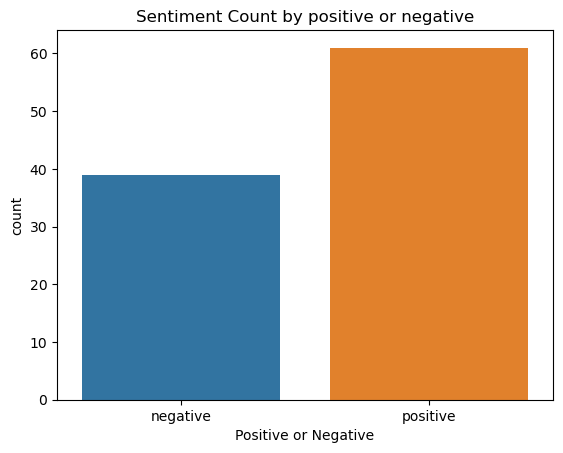

In [16]:
df
cdf = df['positive_negative_count'] = df.groupby('positive_or_negative')['positive_or_negative'].count()
sentiment_count = sns.barplot(x = cdf.index, y =cdf.values)
sentiment_count.set(xlabel = 'Positive or Negative', ylabel = 'count', title = 'Sentiment Count by positive or negative')
#ct = sns.countplot(data = df, x ='positive or negative', order = df[positive_or_negative].value_counts().index)
#plt.show()